# Exploratory Data Analysis with real data

In [1]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib as mpl
from datetime import datetime, timedelta

warnings.filterwarnings('ignore')

We first take a glance at the csv file
```
"Id","5ff96e96938aa0181b987926","5ff96e96938aa0181b987927","5ff97189938aa0181b9aedac","5ff96e96938aa0181b987929","5ff96e96938aa0181b987928","5ffc37c1938aa0181bf3d191","5ffc37c1938aa0181bf3d194","5ffc37c1938aa0181bf3d188","5ffc37c1938aa0181bf3d185","5ffc37c1938aa0181bf3d182","5ffc37c1938aa0181bf3d18e","5ffc37c1938aa0181bf3d18b","5ffc36be938aa0181bf2ec06","5ffc36be938aa0181bf2ec09","5ffc36be938aa0181bf2ebfd"
"Timestamp","reec56/BEWACO 2021/Trạm 1: Bộ chỉ huy Bộ đội biên phòng/WaterLog Logger/WQData - Batt volt","reec56/BEWACO 2021/Trạm 1: Bộ chỉ huy Bộ đội biên phòng/WaterLog Logger/WQData - PTemp","reec56/BEWACO 2021/Trạm 1: Bộ chỉ huy Bộ đội biên phòng/WaterLog Logger/WQData - Salt","reec56/BEWACO 2021/Trạm 1: Bộ chỉ huy Bộ đội biên phòng/WaterLog Logger/WQData - SpCond","reec56/BEWACO 2021/Trạm 1: Bộ chỉ huy Bộ đội biên phòng/WaterLog Logger/WQData - Temp","reec56/BEWACO 2021/Trạm 2: Cống sông Mã/Campbell PakBus Logger/WQData - Batt volt","reec56/BEWACO 2021/Trạm 2: Cống sông Mã/Campbell PakBus Logger/WQData - PTemp","reec56/BEWACO 2021/Trạm 2: Cống sông Mã/Campbell PakBus Logger/WQData - Salt","reec56/BEWACO 2021/Trạm 2: Cống sông Mã/Campbell PakBus Logger/WQData - SpCond","reec56/BEWACO 2021/Trạm 2: Cống sông Mã/Campbell PakBus Logger/WQData - Temperature","reec56/BEWACO 2021/Trạm 2: Cống sông Mã/Campbell PakBus Logger/WQData - Wiper cur","reec56/BEWACO 2021/Trạm 2: Cống sông Mã/Campbell PakBus Logger/WQData - Wiper pos","reec56/BEWACO 2021/Trạm 3: Trạm cấp nước An Hóa/Campbell PakBus Logger/WQData - Batt volt","reec56/BEWACO 2021/Trạm 3: Trạm cấp nước An Hóa/Campbell PakBus Logger/WQData - PTemp","reec56/BEWACO 2021/Trạm 3: Trạm cấp nước An Hóa/Campbell PakBus Logger/WQData - Salt"
"Units","V","°C","ppt","mS","°C","V","°C","ppt","ms/cm","°C","mA","V","V","°C","ppt"
2021-01-09 18:00:00,12.48,22.75,,,,,,,,,,,,,
```

The header is taken from the first 3 rows, from that we will shorten its name as below:

In [2]:
column_names = [
    'Date Time',
    'S1-Batt Volt',
    'S1-PTemp',
    'S1-Salt',
    'S1-SpCond',
    'S1-Temp',
    'S2-Batt Volt',
    'S2-PTemp',
    'S2-Salt',
    'S2-SPCond',
    'S2-Temp',
    'S2-Wiper cur',
    'S2-Wiper pos',
    'S3-Batt Volt',
    'S3-PTemp',
    'S3-Salt'
]

In [3]:
# get data file names
path = r'../datasets/real'
filenames = glob.glob(path + "/*.csv")

pdlst = []
for filepath in filenames:
    pdlst.append(pd.read_csv(filepath, header=2, names=column_names, parse_dates=['Date Time']))

df = pd.concat(pdlst)
df.head()

,Date Time,S1-Batt Volt,S1-PTemp,S1-Salt,S1-SpCond,S1-Temp,S2-Batt Volt,S2-PTemp,S2-Salt,S2-SPCond,S2-Temp,S2-Wiper cur,S2-Wiper pos,S3-Batt Volt,S3-PTemp,S3-Salt
0,2021-01-09 18:00:00,12.48,22.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-11 08:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-11 08:30:00,12.48,26.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-11 08:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-11 08:50:00,12.46,27.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23644 entries, 0 to 23643
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date Time     23644 non-null  datetime64[ns]
 1   S1-Batt Volt  22258 non-null  float64       
 2   S1-PTemp      22258 non-null  float64       
 3   S1-Salt       22212 non-null  float64       
 4   S1-SpCond     22212 non-null  float64       
 5   S1-Temp       22212 non-null  float64       
 6   S2-Batt Volt  7569 non-null   float64       
 7   S2-PTemp      7569 non-null   float64       
 8   S2-Salt       7545 non-null   float64       
 9   S2-SPCond     7157 non-null   float64       
 10  S2-Temp       7087 non-null   float64       
 11  S2-Wiper cur  7569 non-null   float64       
 12  S2-Wiper pos  7569 non-null   float64       
 13  S3-Batt Volt  7560 non-null   float64       
 14  S3-PTemp      7560 non-null   float64       
 15  S3-Salt       7528 non-null   float6

We may drop the first row since it is recorded to far from the others. (`2021-01-09 18:00:00`  `2021-01-11 08:20:00`)

In [5]:
df.drop(index=0, inplace=True)

In [6]:
df.isna().sum() / df.shape[0]

Date Time       0.000000
S1-Batt Volt    0.058622
S1-PTemp        0.058622
S1-Salt         0.060525
S1-SpCond       0.060525
S1-Temp         0.060525
S2-Batt Volt    0.679863
S2-PTemp        0.679863
S2-Salt         0.680878
S2-SPCond       0.697289
S2-Temp         0.700250
S2-Wiper cur    0.679863
S2-Wiper pos    0.679863
S3-Batt Volt    0.680244
S3-PTemp        0.680244
S3-Salt         0.681597
dtype: float64

In [7]:
df.describe()

,S1-Batt Volt,S1-PTemp,S1-Salt,S1-SpCond,S1-Temp,S2-Batt Volt,S2-PTemp,S2-Salt,S2-SPCond,S2-Temp,S2-Wiper cur,S2-Wiper pos,S3-Batt Volt,S3-PTemp,S3-Salt
count,22257.000000,22257.000000,22212.000000,22212.000000,22212.000000,7569.000000,7569.000000,7545.000000,7157.000000,7087.000000,7569.000000,7569.000000,7560.000000,7560.000000,7528.000000
mean,13.064338,29.899616,2.526008,4.974372,29.361293,12.899586,35.924471,1.640496,3.327212,29.250916,31.362771,11.038699,12.907698,35.874942,1.812964
std,0.278916,4.365920,2.891254,4.619590,2.772213,0.380234,4.378299,1.639237,3.246223,1.673656,18.439043,16.167777,0.387524,3.793442,1.662905
min,12.380000,20.000000,-99.990000,-99.990000,-99.990000,11.570000,25.610000,0.000000,0.000000,0.000000,0.000000,0.000000,11.680000,27.260000,0.100000
25%,12.840000,26.750000,0.260000,0.610000,27.850000,12.600000,32.720000,0.130000,0.279000,27.670000,1.590000,1.380000,12.590000,33.080000,0.340000
50%,12.980000,28.750000,2.150000,4.410000,29.930000,12.780000,34.830000,1.320000,2.545000,29.330000,41.350000,1.380000,12.780000,34.940000,1.370000
75%,13.230000,33.500000,4.430000,8.580000,30.750000,13.150000,39.420000,2.730000,5.672000,30.610000,43.360000,31.870000,13.180000,38.800000,2.720000
max,14.180000,42.250000,9.370000,17.370000,32.690000,14.140000,52.380000,27.050000,14.010000,32.630000,60.140000,58.160000,14.110000,48.380000,12.370000


Some erronous value is found (`-99.99`), we will consider these as missing value and fill it after imputation.

In [8]:
df.replace(-99.99, np.nan, inplace=True)

In [9]:
df.describe()

,S1-Batt Volt,S1-PTemp,S1-Salt,S1-SpCond,S1-Temp,S2-Batt Volt,S2-PTemp,S2-Salt,S2-SPCond,S2-Temp,S2-Wiper cur,S2-Wiper pos,S3-Batt Volt,S3-PTemp,S3-Salt
count,22257.000000,22257.000000,22205.000000,22205.000000,22205.000000,7569.000000,7569.000000,7545.000000,7157.000000,7087.000000,7569.000000,7569.000000,7560.000000,7560.000000,7528.000000
mean,13.064338,29.899616,2.558325,5.007461,29.402071,12.899586,35.924471,1.640496,3.327212,29.250916,31.362771,11.038699,12.907698,35.874942,1.812964
std,0.278916,4.365920,2.246714,4.227633,1.552770,0.380234,4.378299,1.639237,3.246223,1.673656,18.439043,16.167777,0.387524,3.793442,1.662905
min,12.380000,20.000000,0.000000,0.000000,0.000000,11.570000,25.610000,0.000000,0.000000,0.000000,0.000000,0.000000,11.680000,27.260000,0.100000
25%,12.840000,26.750000,0.260000,0.610000,27.850000,12.600000,32.720000,0.130000,0.279000,27.670000,1.590000,1.380000,12.590000,33.080000,0.340000
50%,12.980000,28.750000,2.150000,4.410000,29.930000,12.780000,34.830000,1.320000,2.545000,29.330000,41.350000,1.380000,12.780000,34.940000,1.370000
75%,13.230000,33.500000,4.430000,8.580000,30.750000,13.150000,39.420000,2.730000,5.672000,30.610000,43.360000,31.870000,13.180000,38.800000,2.720000
max,14.180000,42.250000,9.370000,17.370000,32.690000,14.140000,52.380000,27.050000,14.010000,32.630000,60.140000,58.160000,14.110000,48.380000,12.370000


**Change into 30-min data**

After looking the column `Date Time`, I can see that not every data is recorded every 10 minutes (sometimes the next data is 30 minutes later than the previous, sometimes 3 minute only).

My solution to make the data easier to work with model is to take data 30 minutes only. This is also a strategy to deal with missing values since the records every 10 min is mostly missing.

In [10]:
thirty_minutes = 60 * 30
selected_rows = df['Date Time'].map(datetime.timestamp) % thirty_minutes == 0
selected_rows

1        False
2         True
3        False
4        False
5         True
         ...  
23639     True
23640    False
23641    False
23642    False
23643     True
Name: Date Time, Length: 23643, dtype: bool

In [11]:
df = df[selected_rows]
df

,Date Time,S1-Batt Volt,S1-PTemp,S1-Salt,S1-SpCond,S1-Temp,S2-Batt Volt,S2-PTemp,S2-Salt,S2-SPCond,S2-Temp,S2-Wiper cur,S2-Wiper pos,S3-Batt Volt,S3-PTemp,S3-Salt
2,2021-01-11 08:30:00,12.48,26.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2021-01-11 09:00:00,12.38,28.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2021-01-11 09:30:00,12.48,26.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2021-01-11 10:00:00,12.48,25.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,2021-01-11 10:30:00,12.48,25.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23630,2021-06-19 13:30:00,13.21,35.75,0.13,0.31,31.66,13.06,40.18,0.11,0.241,31.09,0.78,34.86,13.07,41.87,0.13
23633,2021-06-19 14:00:00,13.16,35.50,0.13,0.31,31.68,13.08,39.57,0.11,0.242,31.05,0.77,35.41,13.00,41.27,0.13
23636,2021-06-19 14:30:00,13.16,35.25,0.13,0.31,31.65,13.09,39.69,0.11,0.244,31.06,0.72,35.07,13.01,40.91,0.13
23639,2021-06-19 15:00:00,13.17,35.00,0.13,0.31,31.48,13.22,39.14,0.11,0.240,31.02,0.72,44.82,NaN,NaN,NaN


In [12]:
df.reset_index(drop=True, inplace=True)

In [13]:
# Check if every rows is recorded after 30 minutes
missing_times = []
for i in range(df.shape[0] - 1):
    if (df.loc[i+1, 'Date Time'] - df.loc[i, 'Date Time']) != timedelta(minutes=30):
        missing_times.append((df.loc[i, 'Date Time'], df.loc[i+1, 'Date Time']))

missing_times

[(Timestamp('2021-01-11 15:30:00'), Timestamp('2021-01-11 18:30:00')),
 (Timestamp('2021-01-12 06:30:00'), Timestamp('2021-01-12 17:30:00')),
 (Timestamp('2021-01-12 21:00:00'), Timestamp('2021-01-12 22:00:00')),
 (Timestamp('2021-01-12 23:30:00'), Timestamp('2021-01-13 00:30:00')),
 (Timestamp('2021-01-13 04:30:00'), Timestamp('2021-01-13 05:30:00')),
 (Timestamp('2021-01-27 12:30:00'), Timestamp('2021-01-27 13:30:00'))]

In [14]:
# Create data for missing timestamps
df_all_missing_timestamps = pd.DataFrame(columns=df.columns)
for f, t in missing_times:
    i = f + timedelta(minutes=30)
    while i < t:
        df_new = pd.DataFrame({'Date Time': i}, index=[0], columns=df.columns)
        df_all_missing_timestamps = df_all_missing_timestamps.append(df_new)
        i += timedelta(minutes=30)

In [15]:
df = df.append(df_all_missing_timestamps).sort_values('Date Time')
df

,Date Time,S1-Batt Volt,S1-PTemp,S1-Salt,S1-SpCond,S1-Temp,S2-Batt Volt,S2-PTemp,S2-Salt,S2-SPCond,S2-Temp,S2-Wiper cur,S2-Wiper pos,S3-Batt Volt,S3-PTemp,S3-Salt
0,2021-01-11 08:30:00,12.48,26.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-11 09:00:00,12.38,28.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-11 09:30:00,12.48,26.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-11 10:00:00,12.48,25.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-11 10:30:00,12.48,25.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7612,2021-06-19 13:30:00,13.21,35.75,0.13,0.31,31.66,13.06,40.18,0.11,0.241,31.09,0.78,34.86,13.07,41.87,0.13
7613,2021-06-19 14:00:00,13.16,35.50,0.13,0.31,31.68,13.08,39.57,0.11,0.242,31.05,0.77,35.41,13.00,41.27,0.13
7614,2021-06-19 14:30:00,13.16,35.25,0.13,0.31,31.65,13.09,39.69,0.11,0.244,31.06,0.72,35.07,13.01,40.91,0.13
7615,2021-06-19 15:00:00,13.17,35.00,0.13,0.31,31.48,13.22,39.14,0.11,0.240,31.02,0.72,44.82,NaN,NaN,NaN


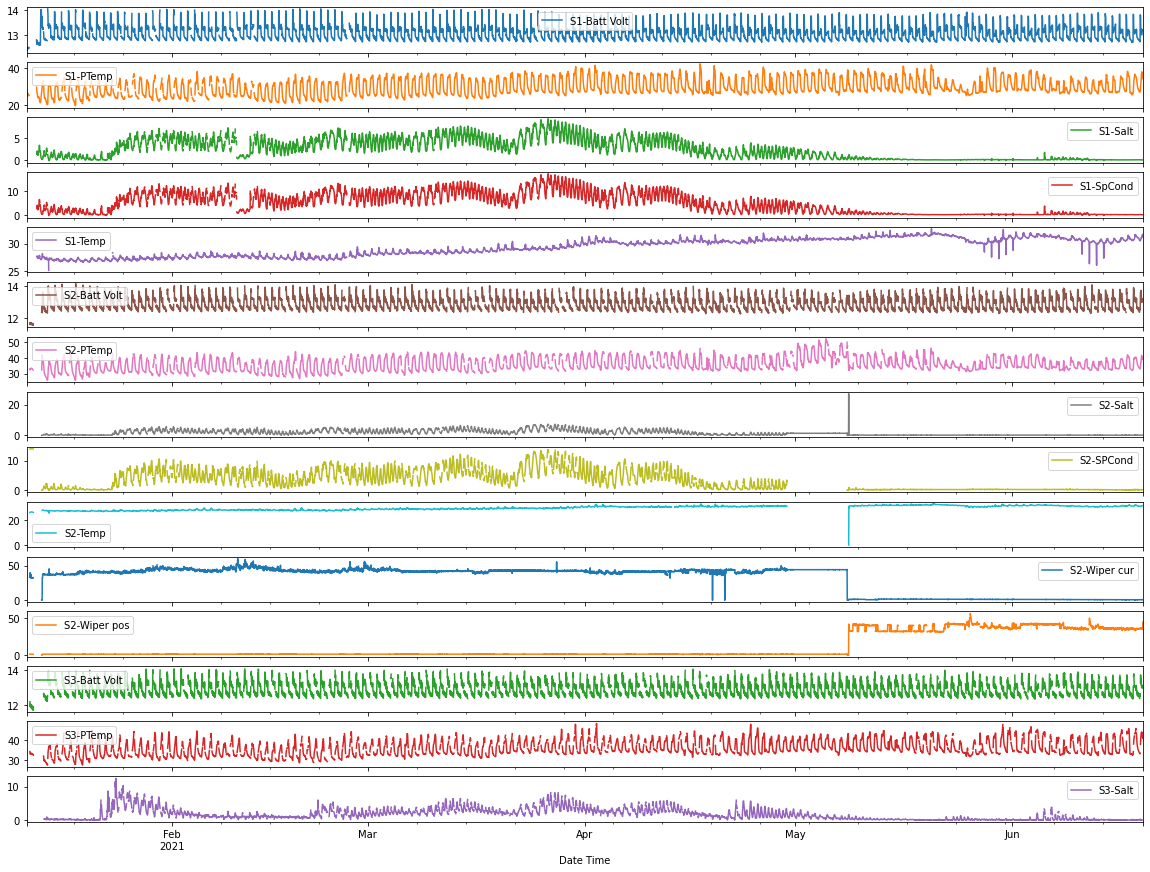

In [16]:
mpl.rcParams['figure.figsize'] = (20, 15)
df.set_index('Date Time', inplace=True)
_ = df.plot(subplots=True)

Also, doing EDA once, I have found the `S1-Temp`, `S2-Temp` also have value `0` as the error value, not outliers, for `S2-Temp` there is also a value 0.18 which I also consider as error. We can also make assumption from the graph above where some unexpected drops occur. So I will also change this into `NaN`.

In [17]:
error_s1temp = df['S1-Temp'] < 1
error_s2temp = df['S2-Temp'] < 1
df.loc[error_s1temp, 'S1-Temp'] = np.nan
df.loc[error_s2temp, 'S2-Temp'] = np.nan

In [18]:
# Recheck proportion of missing values
df.isna().sum() / df.shape[0]

S1-Batt Volt    0.029554
S1-PTemp        0.029554
S1-Salt         0.031908
S1-SpCond       0.031908
S1-Temp         0.031908
S2-Batt Volt    0.064470
S2-PTemp        0.064470
S2-Salt         0.067608
S2-SPCond       0.115209
S2-Temp         0.123970
S2-Wiper cur    0.064470
S2-Wiper pos    0.064470
S3-Batt Volt    0.117824
S3-PTemp        0.117824
S3-Salt         0.121093
dtype: float64

## Dealing with missing values

We cannot use standard imputation technique.
- SimpleImputer (replace missing values with mean, median, most_frequent and constant) may effect the timeseries somehow. For example, in 5 hours, the recorded value is around 12-13, but the mean of the whole data is 21 which made the changes unnatural.
- KNNImputer has the same issue when the nearest neighbors is taken from the data where its timestamp is too far to it. Moreover, the row with all NaNs will be replace with the mean as if we are conducting SimpleImputer.
- Use regression imputation or ML/DL algorithms will need most of the columns filled in each row to have enough information for computing the most suitable value to fill.
- We cannot drop out the rows with NaN since there is too much and make the dataset not a timeseries problem anymore.

Suppose that the change of all attribute depends on time, use **backward & forward fill** is the best thing we can do so far.

In backward fill, all the missing value in the previous row is assign to the value in the next row. There is the case in which the last row is `NaN` and we cannot use backward fill, so the choice is to use forward fill to assign value from the last row in that case.

In [19]:
df_bffill = df.fillna(method='bfill').fillna(method='ffill')
df_bffill

,S1-Batt Volt,S1-PTemp,S1-Salt,S1-SpCond,S1-Temp,S2-Batt Volt,S2-PTemp,S2-Salt,S2-SPCond,S2-Temp,S2-Wiper cur,S2-Wiper pos,S3-Batt Volt,S3-PTemp,S3-Salt
Date Time,,,,,,,,,,,,,,,
2021-01-11 08:30:00,12.48,26.25,1.40,2.86,27.63,11.71,32.85,0.00,13.860,25.62,33.01,1.39,12.17,34.15,0.39
2021-01-11 09:00:00,12.38,28.50,1.40,2.86,27.63,11.71,32.85,0.00,13.860,25.62,33.01,1.39,12.17,34.15,0.39
2021-01-11 09:30:00,12.48,26.50,1.40,2.86,27.63,11.71,32.85,0.00,13.860,25.62,33.01,1.39,12.17,34.15,0.39
2021-01-11 10:00:00,12.48,25.50,1.40,2.86,27.63,11.71,32.85,0.00,13.860,25.62,33.01,1.39,12.17,34.15,0.39
2021-01-11 10:30:00,12.48,25.25,1.40,2.86,27.63,11.71,32.85,0.00,13.860,25.62,33.01,1.39,12.17,34.15,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-19 13:30:00,13.21,35.75,0.13,0.31,31.66,13.06,40.18,0.11,0.241,31.09,0.78,34.86,13.07,41.87,0.13
2021-06-19 14:00:00,13.16,35.50,0.13,0.31,31.68,13.08,39.57,0.11,0.242,31.05,0.77,35.41,13.00,41.27,0.13
2021-06-19 14:30:00,13.16,35.25,0.13,0.31,31.65,13.09,39.69,0.11,0.244,31.06,0.72,35.07,13.01,40.91,0.13


In [20]:
np.all(df_bffill.isna().sum() == 0)

True

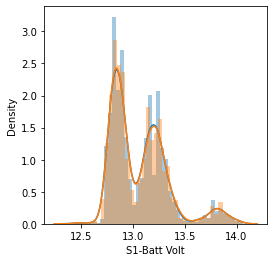

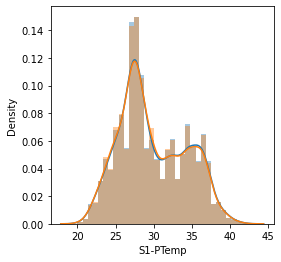

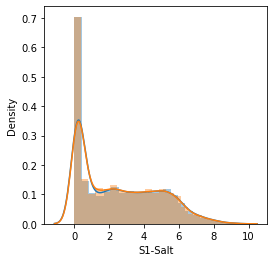

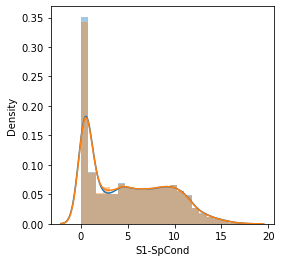

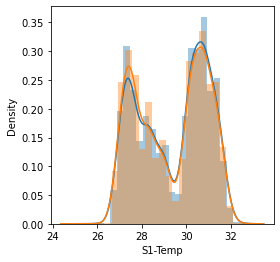

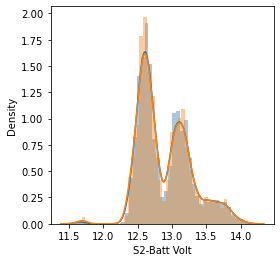

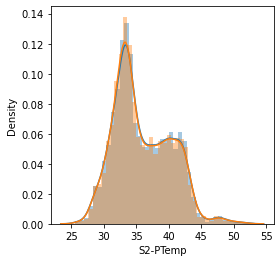

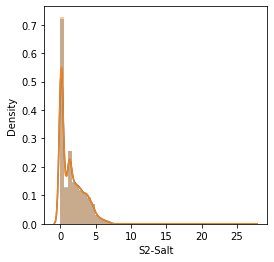

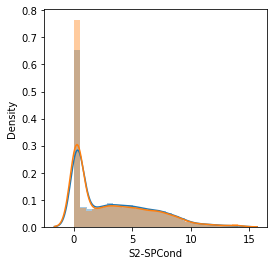

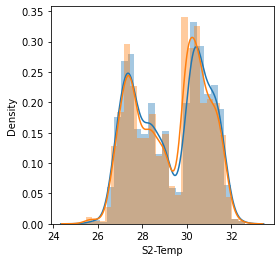

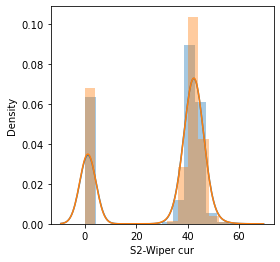

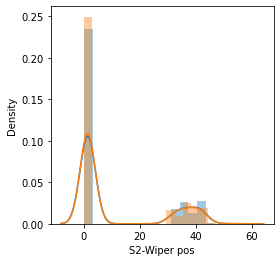

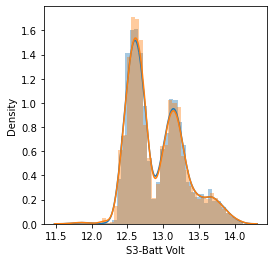

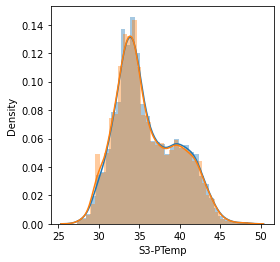

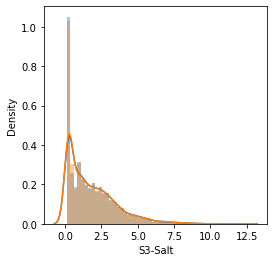

In [21]:
for column in df_bffill.columns:
    plt.figure(figsize=(4, 4))
    sns.distplot(df[column])
    sns.distplot(df_bffill[column])
    plt.show()

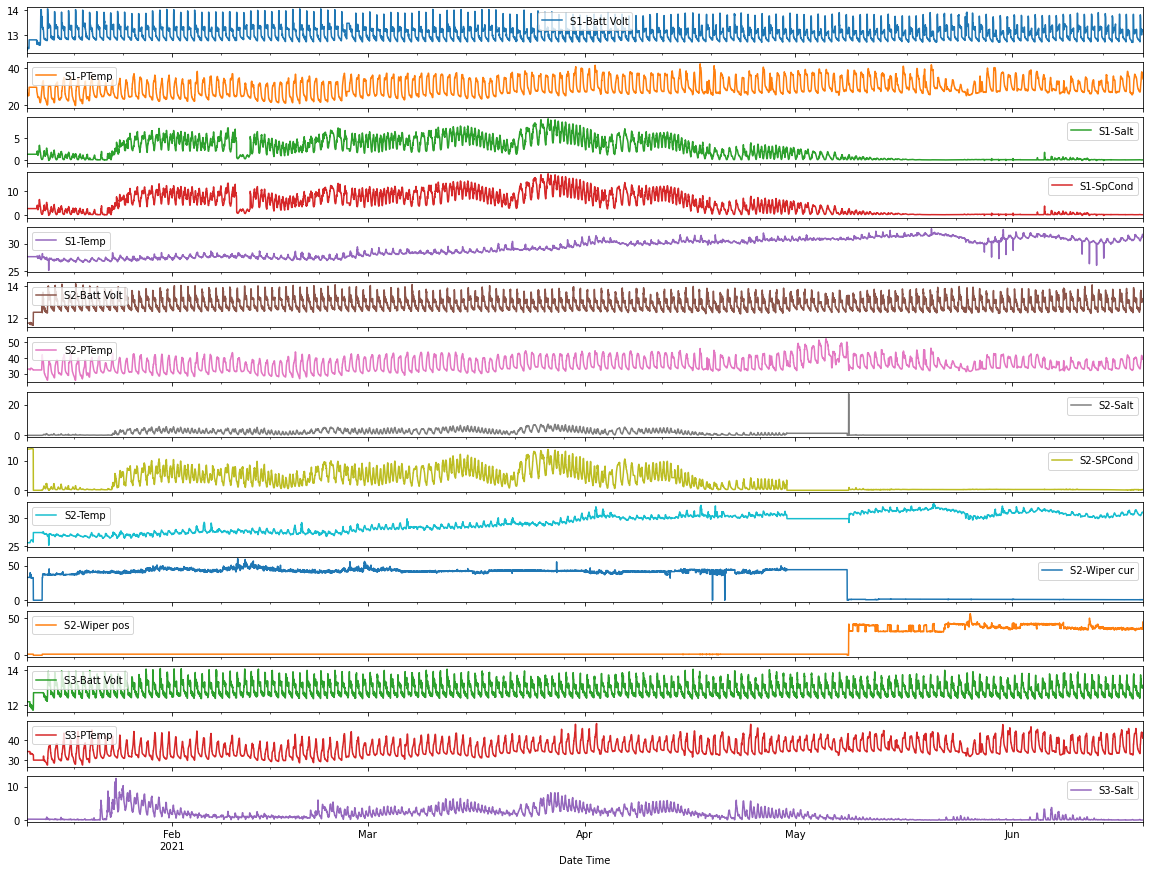

In [22]:
_ = df_bffill.plot(subplots=True)

**2. Seperate into small batches for filling using SimpleImputer**

In this technique, we will take `i` rows in each iteration, if all the input in a column is `NaN`, skip it since we don't have anything to calculate mean, min, max, regression line, etc. Otherwise we can use a basic imputation technique to fill those value. After bunch of iterations, double `i` and repeat the process.

I come up with this solution from this small example:

We have an array with 4 values: `2.5, 3, NaN, 4`. We can naturally fill the `NaN` by `3.5` as the thought that it is between `3` and `4`. since it is a timeseries dataset. If we use the first technique, NaN will be set to `3` for forward fill or `4` for backward fill. Other technique might fill in a "mutative" value.

In [23]:
df['S1-Batt Volt'].isna().index

DatetimeIndex(['2021-01-11 08:30:00', '2021-01-11 09:00:00',
               '2021-01-11 09:30:00', '2021-01-11 10:00:00',
               '2021-01-11 10:30:00', '2021-01-11 11:00:00',
               '2021-01-11 11:30:00', '2021-01-11 12:00:00',
               '2021-01-11 12:30:00', '2021-01-11 13:00:00',
               ...
               '2021-06-19 11:00:00', '2021-06-19 11:30:00',
               '2021-06-19 12:00:00', '2021-06-19 12:30:00',
               '2021-06-19 13:00:00', '2021-06-19 13:30:00',
               '2021-06-19 14:00:00', '2021-06-19 14:30:00',
               '2021-06-19 15:00:00', '2021-06-19 15:30:00'],
              dtype='datetime64[ns]', name='Date Time', length=7647, freq=None)

In [24]:
def fillna(df, i=6):
    df_new = df.copy()
    while i <= df.shape[0]:
        for start in range(0, df.shape[0], i):
            end = start + i if start + i < df.shape[0] else df.shape[0]
            if (df_new.iloc[start:end].isna().sum() < (end - start)):
                df_new.iloc[start:end] = df_new.iloc[start:end].replace(np.nan, df_new.iloc[start:end].mean())
        i *= 2
    return df_new

In [25]:
time_start = datetime.now()
df_imputed = pd.DataFrame(columns=df.columns)
for column in df.columns:
    df_imputed[column] = fillna(df[column], i=3)
time_end = datetime.now()
print(f'Time taken: {time_end - time_start}')

Time taken: 0:00:53.729745


In [26]:
np.all(df_imputed.isna().sum() == 0)

True

In [27]:
df_imputed

,S1-Batt Volt,S1-PTemp,S1-Salt,S1-SpCond,S1-Temp,S2-Batt Volt,S2-PTemp,S2-Salt,S2-SPCond,S2-Temp,S2-Wiper cur,S2-Wiper pos,S3-Batt Volt,S3-PTemp,S3-Salt
Date Time,,,,,,,,,,,,,,,
2021-01-11 08:30:00,12.48,26.25,1.918437,3.838854,27.595729,11.683333,32.618333,0.35375,13.881667,25.686667,35.065,1.383333,12.046667,33.581667,0.380573
2021-01-11 09:00:00,12.38,28.50,1.918437,3.838854,27.595729,11.683333,32.618333,0.35375,13.881667,25.686667,35.065,1.383333,12.046667,33.581667,0.380573
2021-01-11 09:30:00,12.48,26.50,1.918437,3.838854,27.595729,11.683333,32.618333,0.35375,13.881667,25.686667,35.065,1.383333,12.046667,33.581667,0.380573
2021-01-11 10:00:00,12.48,25.50,1.918437,3.838854,27.595729,11.683333,32.618333,0.35375,13.881667,25.686667,35.065,1.383333,12.046667,33.581667,0.380573
2021-01-11 10:30:00,12.48,25.25,1.918437,3.838854,27.595729,11.683333,32.618333,0.35375,13.881667,25.686667,35.065,1.383333,12.046667,33.581667,0.380573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-19 13:30:00,13.21,35.75,0.130000,0.310000,31.660000,13.060000,40.180000,0.11000,0.241000,31.090000,0.780,34.860000,13.070000,41.870000,0.130000
2021-06-19 14:00:00,13.16,35.50,0.130000,0.310000,31.680000,13.080000,39.570000,0.11000,0.242000,31.050000,0.770,35.410000,13.000000,41.270000,0.130000
2021-06-19 14:30:00,13.16,35.25,0.130000,0.310000,31.650000,13.090000,39.690000,0.11000,0.244000,31.060000,0.720,35.070000,13.010000,40.910000,0.130000


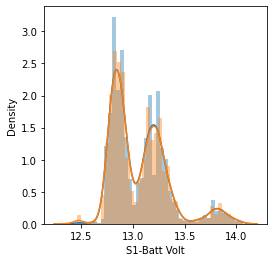

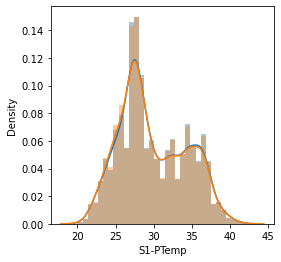

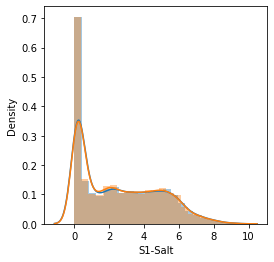

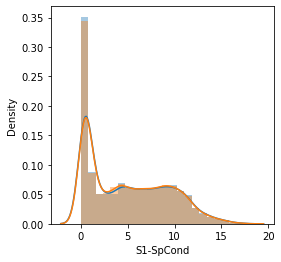

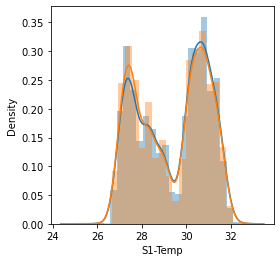

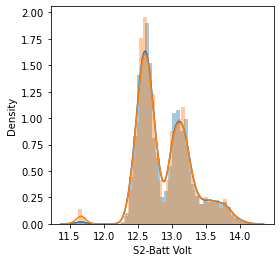

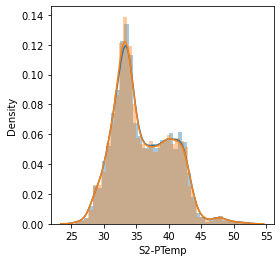

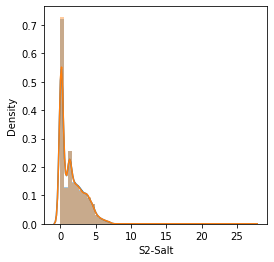

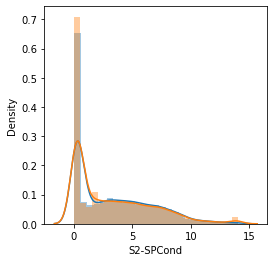

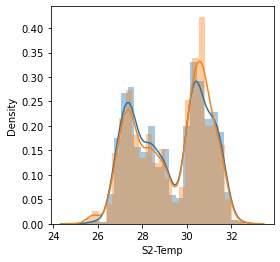

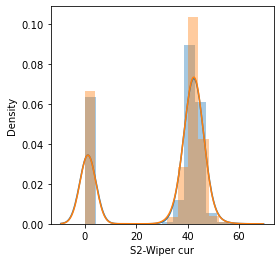

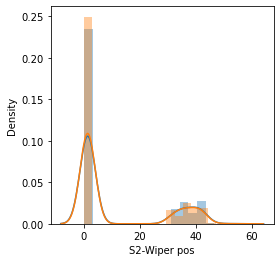

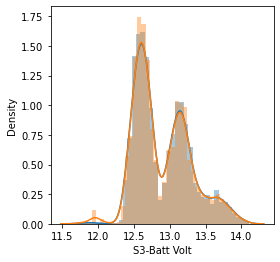

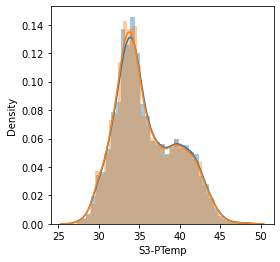

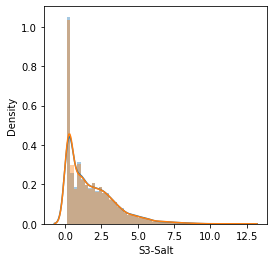

In [38]:
for column in df.columns:
    plt.figure(figsize=(4, 4))
    sns.distplot(df[column])
    sns.distplot(df_imputed[column])
    plt.show()

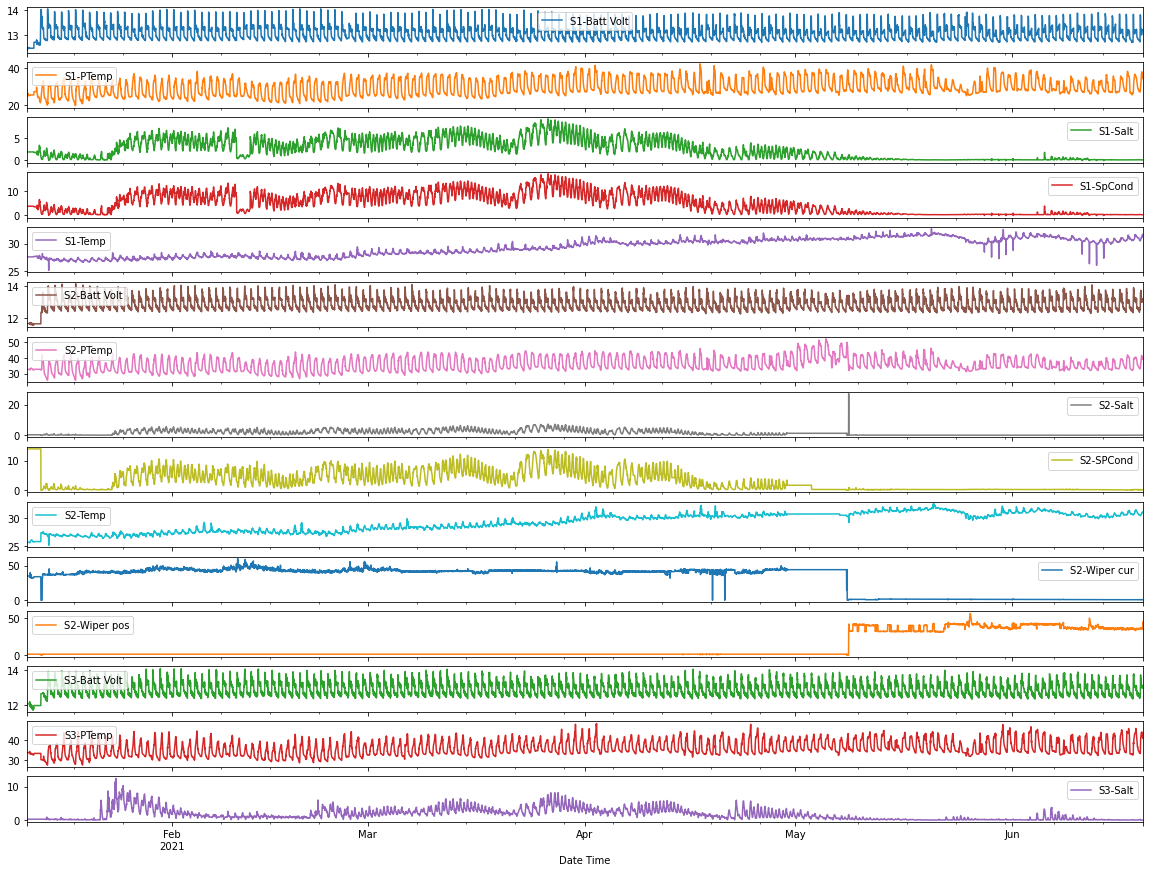

In [29]:
_ = df_imputed.plot(subplots=True)

We can see in the column `S2-Temp`, the backward/forward fill makes the distribution changes since there are too many missing value which has its following value is 0. But the other one make it better.

In [30]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer()

The 2 techniques fill all the missing values without making the distribution changes significantly. However, the second technique that I came up with takes too much time to compile because of the large dataset results in many iterations need to be taken. 

If we are conducting **hourly predictions**, then the dataset may be shorten by taking records of every hours instead of 10 min, so the second technique would take less time.

Since I do not know will the other dataset will have the same problem (high proportion of missing value), and we will take 10-min predictions or hourly predictions, so let I stick with the first one.

## Dealing with outliers

In [31]:
def getboxplot(df):
    df_melted = df.melt(var_name='Column', value_name='Value')
    plt.figure(figsize=(12, 6))
    ax = sns.boxplot(x='Column', y='Value', data=df_melted)
    ax.set_xticklabels(df.keys(), rotation=90)
    plt.show()

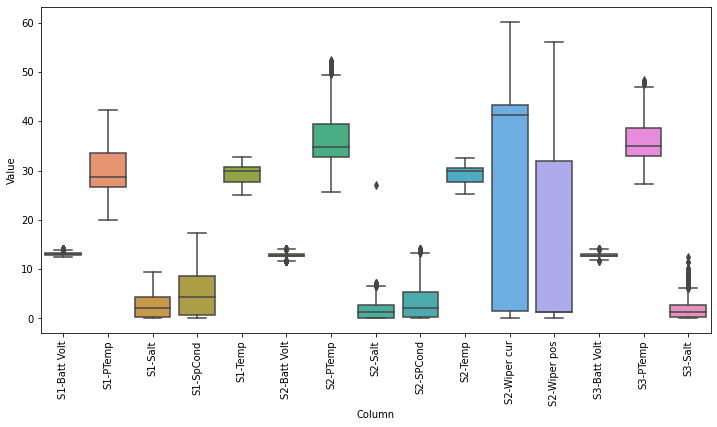

In [32]:
getboxplot(df_bffill)

We will replace the outlier with 5th and 95th percentile.

In [33]:
def replaceOutliers(data, col):
    lower_range = data[col].quantile(0.10)
    upper_range = data[col].quantile(0.90)
    print(f'{col} IQR: [{lower_range}, {upper_range}]')
    data[col] = np.where((data[col] < lower_range), lower_range, data[col])
    data[col] = np.where((data[col] > upper_range), upper_range, data[col])
    
    return data

for col in df_bffill.columns:
    df_rm_outliers = replaceOutliers(df_bffill, col)
df_rm_outliers

S1-Batt Volt IQR: [12.79, 13.36]
S1-PTemp IQR: [24.5, 36.25]
S1-Salt IQR: [0.15, 5.77]
S1-SpCond IQR: [0.36, 10.96]
S1-Temp IQR: [27.25, 31.270000000000003]
S2-Batt Volt IQR: [12.49, 13.43]
S2-PTemp IQR: [30.886, 42.03]
S2-Salt IQR: [0.11, 4.05]
S2-SPCond IQR: [0.191, 8.0]
S2-Temp IQR: [27.16, 31.270000000000003]
S2-Wiper cur IQR: [1.07, 44.7]
S2-Wiper pos IQR: [1.38, 40.0]
S3-Batt Volt IQR: [12.49, 13.45]
S3-PTemp IQR: [31.43, 41.51400000000001]
S3-Salt IQR: [0.19, 4.004000000000005]


,S1-Batt Volt,S1-PTemp,S1-Salt,S1-SpCond,S1-Temp,S2-Batt Volt,S2-PTemp,S2-Salt,S2-SPCond,S2-Temp,S2-Wiper cur,S2-Wiper pos,S3-Batt Volt,S3-PTemp,S3-Salt
Date Time,,,,,,,,,,,,,,,
2021-01-11 08:30:00,12.79,26.25,1.40,2.86,27.63,12.49,32.85,0.11,8.000,27.16,33.01,1.39,12.49,34.150,0.39
2021-01-11 09:00:00,12.79,28.50,1.40,2.86,27.63,12.49,32.85,0.11,8.000,27.16,33.01,1.39,12.49,34.150,0.39
2021-01-11 09:30:00,12.79,26.50,1.40,2.86,27.63,12.49,32.85,0.11,8.000,27.16,33.01,1.39,12.49,34.150,0.39
2021-01-11 10:00:00,12.79,25.50,1.40,2.86,27.63,12.49,32.85,0.11,8.000,27.16,33.01,1.39,12.49,34.150,0.39
2021-01-11 10:30:00,12.79,25.25,1.40,2.86,27.63,12.49,32.85,0.11,8.000,27.16,33.01,1.39,12.49,34.150,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-19 13:30:00,13.21,35.75,0.15,0.36,31.27,13.06,40.18,0.11,0.241,31.09,1.07,34.86,13.07,41.514,0.19
2021-06-19 14:00:00,13.16,35.50,0.15,0.36,31.27,13.08,39.57,0.11,0.242,31.05,1.07,35.41,13.00,41.270,0.19
2021-06-19 14:30:00,13.16,35.25,0.15,0.36,31.27,13.09,39.69,0.11,0.244,31.06,1.07,35.07,13.01,40.910,0.19


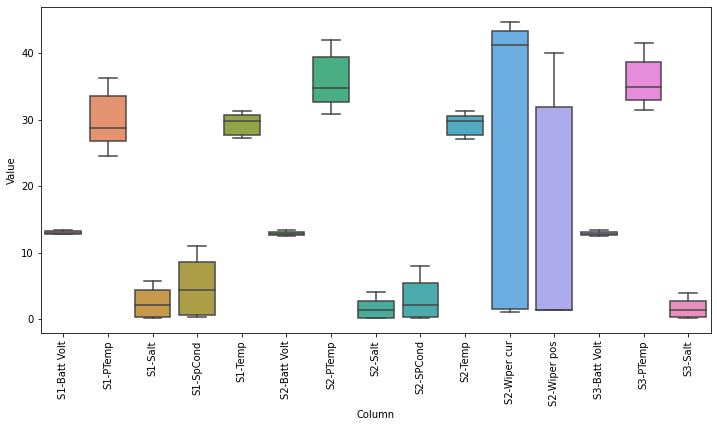

In [34]:
getboxplot(df_rm_outliers)

In [35]:
df_final = df_rm_outliers

Look through the line graph after dealing with missing values & outliers

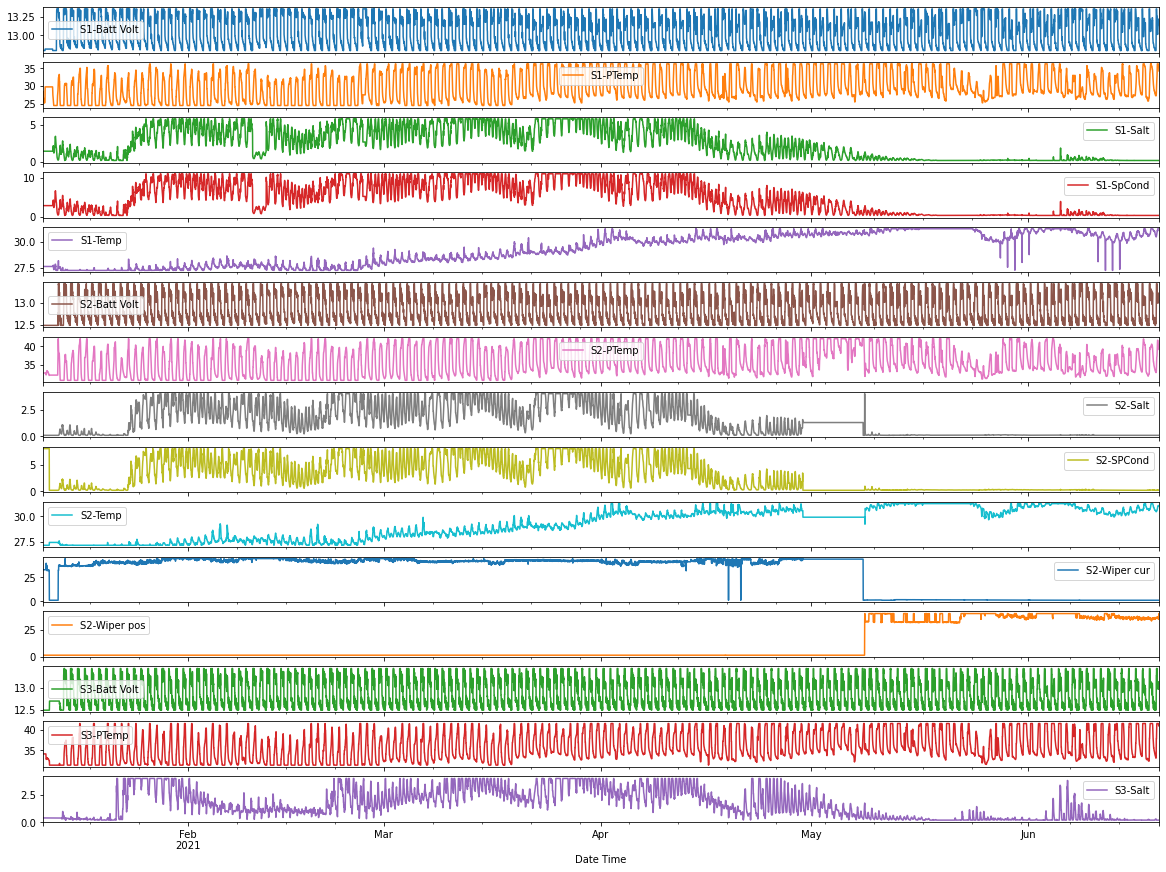

In [36]:
_ = df_final.plot(subplots=True)

## Check correlation

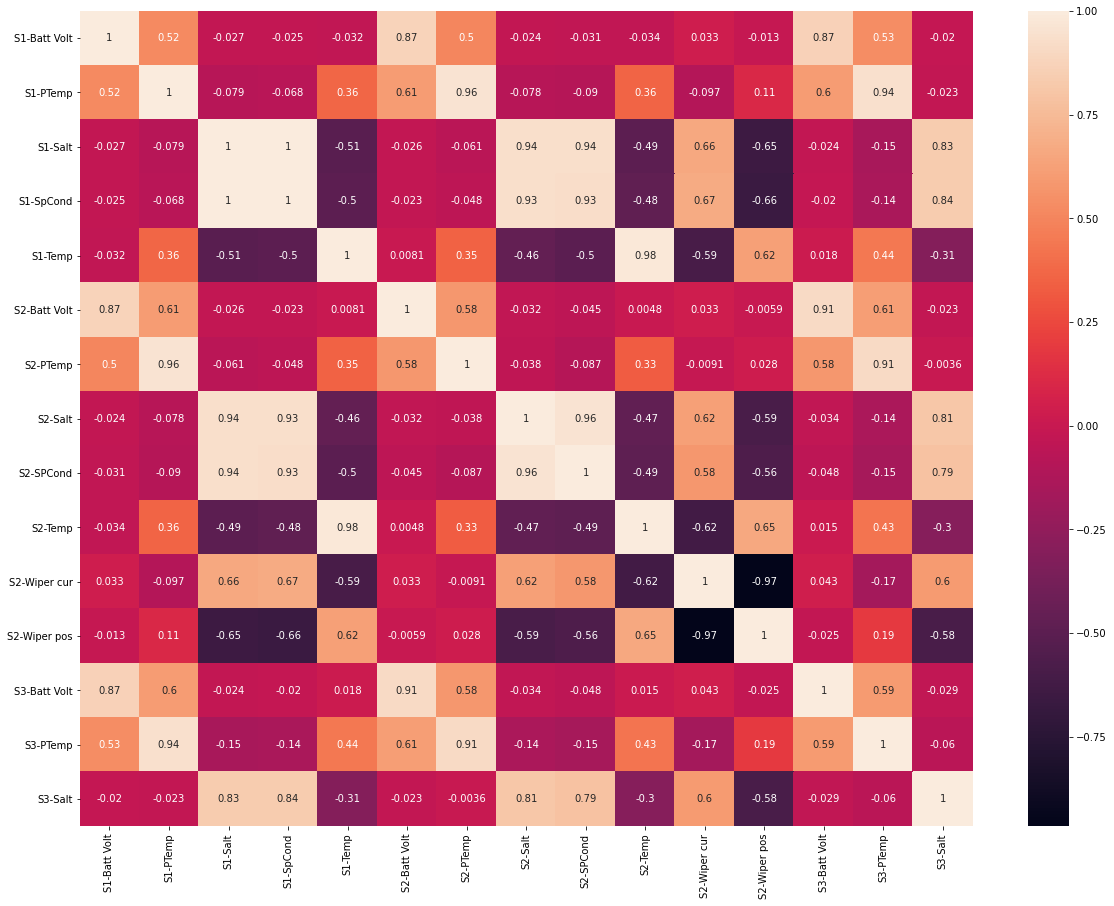

In [37]:
plt.figure(figsize=(20, 15))
sns.heatmap(df_final.corr(), annot=True)
plt.show()

We may remove `S1-SpCond` since it correlation coefficient with `S1-Salt` is `1`. But since when we look at the corr-coef at `S2-SpCond` and `S2-Salt` is not `1` and we don't have much information about these two attributes in practical, so we should keep `S1-Salt`.

Furthermore, I am not sure whether the value in each station is depends on each other or not, so I will not seperate the dataset into 3 smaller ones for 3 stations. After knowing more about the data, I will update this notebook.